<a href="https://colab.research.google.com/github/RogerioDDantas/Programacao_Basica-PRIA_2022-/blob/main/TRABALHO_FINAL_Programaci%C3%B3n_B%C3%A1sica_(PRIA2022).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ALUNO: Rogério Daniel Dantas

Disciplina: Programación Básica_(PRIA2022)

TRABALHO FINAL:

RESOLUÇÃO DO TRABALHO:

# **Trabalho Final**

Considere o projeto em anexo, que apresenta a modelagem cinemática (Forward Kinematics - FK) de um robô manipulador planar com dois graus de liberdade (de maneira simples, 2 juntas de movimentação). 

Inicialmente, vocês deverão entender o código implementado e alterá-lo, projetando a implementação de uma classe *Robot*, a qual deverá ser adequadamente projetada para manter a funcionalidade do referido projeto.

A segunda etapa consiste em alterar a interface gráfica, permitindo que seja visualizado diferentes tipos de robôs manipuladores, contendo 1, 2, ou 3 juntas rotacionais, de acordo com o objeto instanciado da classe *Robot*.

Por fim, deverá ser apresentada, na interface gráfica, a posição cartesiana $(X,Y)$ da extremidade final do robô manipulador, informação essa que deverá ser fornecida pela classe implementada.


* Data de envio : **TBD**


In [1]:
pip install ipympl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install ipywidgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install ipympl
from google.colab import output
output.enable_custom_widget_manager()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


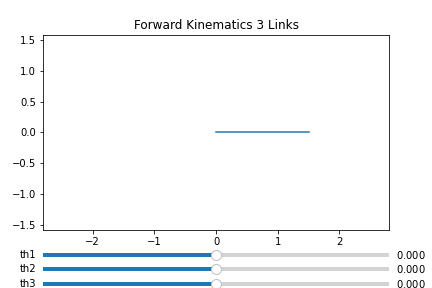

In [5]:
# TRBALHO FINAL: Código recebido!.


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import math

%matplotlib widget

l1 = 0.5    # Comprimento do ELO1
l2 = 0.5    # Comprimento do ELO2
l3 = 0.5    # Comprimento do ELO3

L = [l1, l2, l3]
th = [0.0*math.pi, 0.0*math.pi, 0.0*math.pi]

def FK(th, L):
  global x3, y3
  L1, L2, L3 = L
  Th1, Th2, Th3 = th
  x0 = 0.0
  y0 = 0.0

  x1 = L1*math.cos(Th1)
  y1 = L1*math.sin(Th1)
  #print('{:.2f},{:.2f}'.format(x1, y1))

  x2 = L1*math.cos(Th1) + L2*math.cos(Th1 + Th2)
  y2 = L1*math.sin(Th1) + L2*math.sin(Th1 + Th2)
  #print('{:.2f},{:.2f}'.format(x2, y2))

  x3 = L1*math.cos(Th1) + L2*math.cos(Th1 + Th2) + L3*math.cos(Th1 + Th2 + Th3)
  y3 = L1*math.sin(Th1) + L2*math.sin(Th1 + Th2) + L3*math.sin(Th1 + Th2+ Th3)
  #print('{:.2f},{:.2f}'.format(x3, y3))

  X = np.array([[x0,y0], [x1,y1], [x2,y2], [x3,y3]])
  return X

def update_th1(slider_val):
  th[0] = slider_val
  atualiza()
  

def update_th2(slider_val):
  th[1] = slider_val
  atualiza()

def update_th3(slider_val):
  th[2] = slider_val
  atualiza()

  
def atualiza():
  p = FK(th,L)

  graph.set_data(p.T[0], p.T[1])
  graph.set_linestyle('-')
  graph.set_linewidth(5)
  graph.set_marker('o')
  graph.set_markerfacecolor('g')
  graph.set_markeredgecolor('g')
  graph.set_markersize(10)
  #ax.text(2.0, 1.8,"{:.2fP(},{:.2f})".format(x3,y3))
  #print(x3,y3)
  
  #fig.canvas.draw_idle()
  #fig.canvas.draw()
  #fig.canvas.flush_events()
  ax.text(1.8, 1.8, "({:.2f},{:.2f})".format(x3,y3), transform=fig.transFigure)
  #plt.draw() 
  fig.canvas.flush_events() 
  fig.canvas.draw_idle()   
 
  

p = FK(th,L)
fig, ax = plt.subplots()
plt.title('Forward Kinematics 3 Links')
plt.axis('equal')
#plt.text(x3,y3,'(x{:.2f},y{:.2f})'.format(x3,y3))
plt.subplots_adjust(left=.1, bottom=0.20) 
plt.xlim([-2.8, 2.8])
plt.ylim([-2.8, 2.8])
#ax.text(1,1,"{:.2fP(},{:.2f})".format(x3,y3))

graph, = plt.plot(p.T[0], p.T[1])

slider1_pos = plt.axes([0.1, 0.10, 0.8, 0.03])
slider2_pos = plt.axes([0.1, 0.05, 0.8, 0.03])
slider3_pos = plt.axes([0.1, 0.0, 0.8, 0.03])

threshold_slider1 = Slider(slider1_pos, 'th1', -1.0*math.pi, 1.0*math.pi, 0*math.pi)
threshold_slider2 = Slider(slider2_pos, 'th2', -1.0*math.pi, 1.0*math.pi, 0*math.pi)
threshold_slider3 = Slider(slider3_pos, 'th3', -1.0*math.pi, 1.0*math.pi, 0*math.pi)
#position_efetuador = 

threshold_slider1.on_changed(update_th1)
threshold_slider2.on_changed(update_th2)
threshold_slider3.on_changed(update_th3)

plt.grid()
plt.show()